# Introduction

This worksheet focuses on Neural Networks. You will:

- Implement your own version of a Single Layer Perceptron (SLP) to understand the underlying mechanics, and compare it with an equivalent implementation built using `PyTorch`.

- Build and train Multi‑Layer Perceptrons (MLPs) in `PyTorch` for both classification and regression tasks, exploring how to design, configure, and optimise these neural network models.

# 0. Preliminaries
We firstly import NumPy and matplotlib as we will be using these throughout the worksheet. We use a function %matplotlib inline to display plots in the worksheet.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Single Layer Perceptron
In this question, you will build and train a single‑layer perceptron using PyTorch to make predictions on the breast cancer dataset.
This is a binary classification task where the goal is to classify each instance as malignant or benign based on 30 numerical features extracted from medical images.

In this question, you will:  
(a) Load the breast cancer dataset from  `sklearn` and store the features and targets in suitable variables.  
(b) Separate your data into a training and test split.    
(c) (Optional) Write your own function to implement Single Layer Perceptron.  
(d) Implement Single Layer Perceptron in `PyTorch` (e.g., a single `nn.Linear` layer with a `sigmoid` output).  
    Train your PyTorch perceptron on the training data using an appropriate loss function and an optimizer.  
(e) Evaluate the performance of both models on the test data using appropriate metrics (e.g., accuracy, precision).   
(f) Plot the confusion matrix to visualise the performance of your model.

## Part (a)  
Import the package `datasets` from `sklearn` and then load the load_breast_cancer dataset (function is `load_breast_cancer()`). Save the data into a variable `X` and the targets into a variable `Y`.  
Take a look at the data in `X`. How many datapoints are there? How many features does each datapoint have? (Hint: use `np.shape`).  
Take a look at the targets. Is this suitable for a classification algorithm or a regression algorithm?  

In [2]:
#TODO: import suitable packages, load the dataset, and save data and targets into variables X and Y
from sklearn import datasets

breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


## Part (b)

Use the function `train_test_split` from `sklearn.model_selection` to split your data into a training set and a held-out test set. Use a test set that is 0.2 of the original dataset. Set the parameter `random_state` to 10 to help with replication.

In [3]:
# TODO: import the package train_test_split from sklearn.model_selection.
# Split the dataset into Xtr, Xtest, Ytr, Ytest. 
from sklearn.model_selection import train_test_split
Xtr, Xtest, Ytr, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 10)

Perceptrons are very sensitive to feature scale. Standardise your input data by applying `StandardScaler` from `sklearn.preprocessing` to both the training set (`Xtr`) and the test set (`Xtest`).

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr)
Xtest = scaler.transform(Xtest)

## (Optional) Part (c)  
Recall from the lecture that a single-layer perceptron runs as follows:  

**Training step**:  
- For each training datapoint $(\vec{x}_i)$:  
  - Compute the linear combination $(z = \vec{w} \cdot \vec{x}_i + b)$.  
  - Pass $(z)$ through the activation function (sigmoid function in this case) to get the predicted class $(y_{\text{pred}})$.  
  - Compute the error as $(e = y_i - y_{\text{pred}})$, where $(y_i)$ is the true label.  
  - Update the weights and bias using the perceptron learning rule:  
    $[
    \vec{w} \gets \vec{w} + \eta \cdot e \cdot \vec{x}_i  
    ]  
    [
    b \gets b + \eta \cdot e
    ]$  
  Here, $(\eta)$ is the learning rate.  

**Prediction step**:  
- For a given datapoint $(\vec{x})$:  
  - Compute the linear combination $(z = \vec{w} \cdot \vec{x} + b)$.  
  - Pass $(z)$ through the step function to obtain the class prediction.  

Write function(s) to implement the training and prediction steps. Y

In [5]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate, iterat):
        #TO DO# initialise the weights to random values and set the bias to 0
        self.weights = np.random.rand(input_size)  # Random initial weights
        self.bias = 0  # Bias initialised to 0
        self.learning_rate = learning_rate
        self.iterat = iterat

    def activation(self, z):
        #TO DO # Write a function to implement the **sigmoid activation function**. 
        return 1 / (1 + np.exp(-z))

   
    def train(self, X, y):
        for epoch in range(self.iterat):
            for i in range(X.shape[0]):
                # Calculate the linear combination
                z = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(z)

                #TODO# Calculate error between target and predicted values
                error = y[i] - y_pred
                
                #TODO# update the weights and bias according to the above equations
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)
#Train the perceptron
input_size = Xtr.shape[1] # To pass the number of features
perceptron = SingleLayerPerceptron(input_size=input_size, learning_rate=0.01, iterat=20)
perceptron.train(Xtr, Ytr)

#Test the perceptron
my_y_pred_prob = perceptron.predict(Xtest)
my_Ypred = (my_y_pred_prob >= 0.5).astype(int).flatten()

## Part (d) Perceptron in PyTorch
In this step, you will build a simple neural network model that implements a single‑layer perceptron in PyTorch. A perceptron consists of one fully‑connected (linear) layer that computes a weighted sum of the inputs, followed by an activation function that maps this value to a predicted class. For binary classification, we apply a sigmoid activation, which converts the linear output into a probability between 0 and 1.

### Fully-connected layer
A fully‑connected layer connects every input feature to every output unit. In PyTorch, this is implemented using the `nn.Linear` class, which performs the linear transformation  $(z = \vec{w} \cdot \vec{x}_i + b)$ before the activation function is applied.

Documentation: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

### Activation Functions
PyTorch does not include activation functions inside `nn.Linear`, so they must be added explicitly. For a perceptron used in binary classification, we apply `torch.sigmoid()` to the output of the linear layer. This produces a probability that can be thresholded to obtain a class label.

Forward Pass
In PyTorch, the `forward()` method defines how data flows through the model. Inputs are passed through the linear layer, then through the activation function, and the final output is returned. This computation graph determines how gradients are calculated during training.

Let's import necessary libraries

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

In [7]:
class PerceptronTorch(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))
        

After desigining our network, we need to create a training function to calculate the loss for each input and perform backpropagation to optimise the network.
During training, the weights of all the layers will be updated.

Below, we build a training function to train the NN over a fixed number of epochs (an epoch is one iteration over the whole training dataset).
The function also prints the performance of both training and development/validation set after each epoch.

Here we use binary cross‑entropy loss, which is the standard loss function for binary classification tasks such as logistic regression. The module `nn.BCELoss()` expects the model to output probabilities (after a sigmoid), so we do not need to implement any additional activation inside the loss function.

Binary cross entropy Loss: https://docs.pytorch.org/docs/stable/generated/torch.nn.BCELoss.html

The optimizer object implements a particular algorithm for updating the weights. Here, we will use the Adam optimizer, which is a variant of stochastic gradient descent method that tends to find a better solution in a smaller number of iterations than standard SGD.

Optimization: https://pytorch.org/docs/stable/optim.html

The cell below defines a training function for our classifier. 

In [8]:
model = PerceptronTorch(input_dim=Xtr.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

We need to convert our data into PyTorch‑compatible tensors so the model can train on it. PyTorch cannot operate directly on NumPy arrays — it requires tensors, which are optimized for automatic differentiation and efficient computation on both CPUs and GPUs.

In [9]:
Xtr_t = torch.tensor(Xtr, dtype=torch.float32)
Ytr_t = torch.tensor(Ytr, dtype=torch.float32).view(-1, 1)

Xtest_t = torch.tensor(Xtest, dtype=torch.float32)

### Train the Perceptron 

This training loop does the following:

- Runs for a fixed number of epochs so the model repeatedly sees the training data.
- Performs a forward pass on the training set to compute predictions.
- Calculates the training loss and stores it for plotting.
- Backpropagates the error and updates the model’s weights using the optimizer.
- Evaluates the model on the test set (in eval mode and without gradients).
- Records the validation loss to track generalisation.

Plots both curves so you can compare training vs. validation loss over time.

**TO-DO:**  Train the network for 30 epochs and plot the losses by completing the cell below. At which epoch did we get the best model fit? How could we use the dev set losses to return the best model? Remember that neural networks tend to overfit if trained too long, as they have many parameters and are very flexible. 

Note that the answer can vary each time you run the training process due to random initialisation of the model weights and shuffling of the dataset. 

ANSWER
   * The plot shows the best fit around ... epochs before it starts to overfit, as the validation loss converges while training loss goes down 
   * If dev set loss stops going down for a long time, but training set loss keeps decreasing, the model may be overfitting.
   * We can stop training at the point where dev set loss stops decreasing 
   * Or we could save the model with best dev set performance and use that model to make predictions.

Epoch 1/num_epochs, Loss: 0.7955
Epoch 2/num_epochs, Loss: 0.7181
Epoch 3/num_epochs, Loss: 0.6490
Epoch 4/num_epochs, Loss: 0.5881
Epoch 5/num_epochs, Loss: 0.5349
Epoch 6/num_epochs, Loss: 0.4887
Epoch 7/num_epochs, Loss: 0.4489
Epoch 8/num_epochs, Loss: 0.4146
Epoch 9/num_epochs, Loss: 0.3850
Epoch 10/num_epochs, Loss: 0.3593
Epoch 11/num_epochs, Loss: 0.3371
Epoch 12/num_epochs, Loss: 0.3176
Epoch 13/num_epochs, Loss: 0.3006
Epoch 14/num_epochs, Loss: 0.2856
Epoch 15/num_epochs, Loss: 0.2723
Epoch 16/num_epochs, Loss: 0.2604
Epoch 17/num_epochs, Loss: 0.2498
Epoch 18/num_epochs, Loss: 0.2402
Epoch 19/num_epochs, Loss: 0.2316
Epoch 20/num_epochs, Loss: 0.2237
Epoch 21/num_epochs, Loss: 0.2165
Epoch 22/num_epochs, Loss: 0.2099
Epoch 23/num_epochs, Loss: 0.2038
Epoch 24/num_epochs, Loss: 0.1982
Epoch 25/num_epochs, Loss: 0.1930
Epoch 26/num_epochs, Loss: 0.1881
Epoch 27/num_epochs, Loss: 0.1836
Epoch 28/num_epochs, Loss: 0.1794
Epoch 29/num_epochs, Loss: 0.1754
Epoch 30/num_epochs, Lo

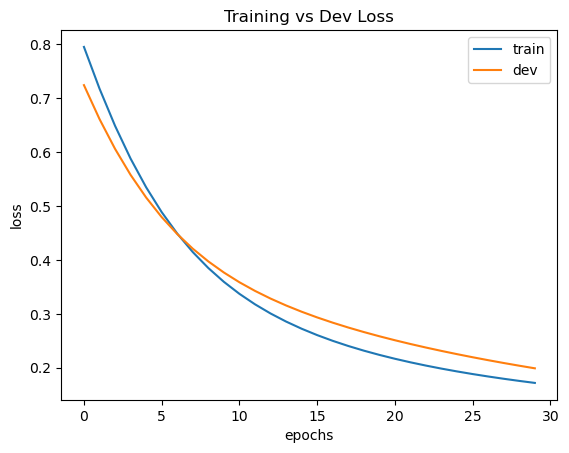

In [10]:
num_epochs=30
train_losses = []
dev_losses = []

### TRAINING LOOP WITH LOSS TRACKING ###
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # forward pass
    outputs = model(Xtr_t)
    loss = criterion(outputs, Ytr_t)
    train_losses.append(loss.item())

    # backward + update
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/num_epochs, Loss: {loss.item():.4f}")

    # compute dev/validation loss
    model.eval()
    with torch.no_grad():
        dev_out = model(Xtest_t)
        dev_loss = criterion(dev_out, torch.tensor(Ytest, dtype=torch.float32).view(-1,1))
        dev_losses.append(dev_loss.item())

### PLOT ###
plt.figure()

plt.plot(train_losses, label='train')
plt.plot(dev_losses, label='dev')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title("Training vs Dev Loss")
plt.show()

### Predict on Test Data
Now we can run the model in evaluation mode, generate predicted probabilities for the test set, and convert those probabilities into binary class labels by applying a 0.5 threshold.

In [11]:
with torch.no_grad():
    y_pred_prob = model(Xtest_t)
    Y_pred = (y_pred_prob >= 0.5).float().numpy().flatten()

## Part (e) 
Use the built in metrics in sklearn to calculate the accuracy of both classifiers on the Testing set.

In [12]:
##TODO## Write your answer here
from sklearn.metrics import accuracy_score
#Evaluate the accuracy
my_accuracy = accuracy_score(Ytest, my_Ypred)
print(f"Accuracy of my Perceptron: {my_accuracy * 100:.2f}%")

accuracy = accuracy_score(Ytest, Y_pred)
print(f"Accuracy of torch Perceptron: {accuracy * 100:.2f}%")

Accuracy of my Perceptron: 96.49%
Accuracy of torch Perceptron: 97.37%


## Part(f) 
Plot the confusion matrix to visualise the performance of your model.

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test set and display classification report and confusion matrix
print("Classification Report 1:")
print(classification_report(Ytest, my_Ypred))
print("SLP Confusion Matrix 1:")
print(confusion_matrix(Ytest, my_Ypred))

print("Classification Report 2 :")
print(classification_report(Ytest, Y_pred))
print("SLP Confusion Matrix 2:")
print(confusion_matrix(Ytest, Y_pred))

Classification Report 1:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       0.99      0.96      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

SLP Confusion Matrix 1:
[[38  1]
 [ 3 72]]
Classification Report 2 :
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        39
           1       0.99      0.97      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

SLP Confusion Matrix 2:
[[38  1]
 [ 2 73]]


# 2. Multilayer Perceptron
<img src="https://raw.githubusercontent.com/ematm0067/2025_26/6e01ac01c1e0e85ad7e89176a16e8facc13a199a/worksheets/source/Picture1.png" width="600" />

The input layer, located on the far left, contains neurons that correspond to the input features. Each neuron in the hidden layer processes the values from the previous layer through a weighted sum, which is then passed through a non-linear activation function, such as `ReLU`. Finally, the output layer takes the values from the last hidden layer and converts them into the model’s output.

# 2.1. Multi‑class Classification using a Multilayer Perceptron
Now that you’ve compared your Perceptron implementation with the torch Perceptron for binary classification, you will extend your work to a multiclass classification task using the load_digits dataset.
This dataset contains 8×8 grayscale images of handwritten digits (0–9), represented as 64 numerical pixel‑intensity features.

In this task, you will implement a Multilayer Perceptron (MLP) using PyTorch.

(a) Load the dataset
Use `sklearn.datasets.load_digits()` to obtain the feature matrix and target labels.
Store them in appropriate variables.

(b) Split the data
Use train_test_split to divide the dataset into training and test sets.
Convert both splits into PyTorch tensors or wrap them in TensorDataset + DataLoader.

(c) Build and train a PyTorch MLP
Create a neural network with at least:
- an input layer
- one or more hidden layers (choose `relu` as activation function)
- an output layer of size 10 (one per digit class)


Train the model for several epochs and record the training loss.

(d) Evaluate your model’s performance on the test set (e.g., accuracy, precision).  
(e) Modify your hyperparameters.  

## Part (a)  
From `sklearn.datasets` load the load_digits dataset (function is `load_digits()`). Save the data into a variable `X1` and the targets into a variable `Y1`.  
Take a look at the data in `X1`. How many datapoints are there? How many features does each datapoint have? (Hint: use `np.shape`). 
Take a look at the targets. How many classes does the output need to be classified into??  
Look at the values of `X1`. Does the data need to be normalised?

In [14]:
#TODO# 
#Load the dataset
digits = datasets.load_digits()
X1 = digits.data
Y1 = digits.target
print(X1.shape)
print(Y1.shape)

(1797, 64)
(1797,)


Look at the images corresponding to the input. Set the value of the target as the output.

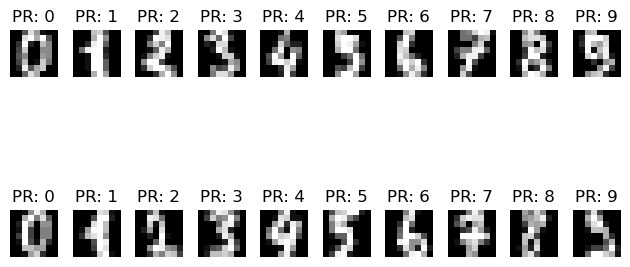

In [15]:
fig, axes = plt.subplots(2, 10)
for i in range(20):
    axes[i//10, i %10].imshow(digits.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"PR: {digits.target[i]}")
    
plt.tight_layout()
plt.show()


## Part (b)  
Split the dataset into training and testing sets

In [16]:
Xtr1, Xtest1, Ytr1, Ytest1 = train_test_split(X1, Y1, test_size=0.2, random_state=42)

## Part (c) 
Define a multilayer perceptron (MLP) with two hidden layers. Each hidden layer should apply a linear transformation followed by a ReLU activation, and the final linear layer should produce the output. Use `nn.Sequential` to connect the layers and implement the forward pass.

In [22]:
class MLP_Class(nn.Module):
    def __init__(self, input_dim, hidden=10, output_dim=10):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, output_dim)  
        )

    def forward(self, x):
        return self.model(x)


Set up the MLP by specifying the input size, number of output classes, and the hidden layer sizes. Then create the model and prepare it for training by choosing an appropriate loss function (CrossEntropyLoss for multi‑class classification) and an optimizer (Adam with a learning rate of 0.01).

In [23]:
input_dim = Xtr1.shape[1]
output_dim = len(torch.unique(torch.tensor(Ytr1)))
hidden_layer_sizes=10
model1 = MLP_Class(input_dim, hidden_layer_sizes, output_dim)

criterion1 = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.01)

As before, we need to convert our data into PyTorch‑compatible tensors so the model can train on it. 

In [24]:
Xtr_t1 = torch.tensor(Xtr1, dtype=torch.float32)
Ytr_t1 = torch.tensor(Ytr1, dtype=torch.long)
Ytest_t1 = torch.tensor(Ytest1, dtype=torch.long)

Xtest_t1 = torch.tensor(Xtest1, dtype=torch.float32)

Identify the epoch at which the validation loss stops decreasing.

Epoch 1/num_epochs, Loss: 2.3067
Epoch 2/num_epochs, Loss: 2.1851
Epoch 3/num_epochs, Loss: 2.1125
Epoch 4/num_epochs, Loss: 2.0064
Epoch 5/num_epochs, Loss: 1.9115
Epoch 6/num_epochs, Loss: 1.8442
Epoch 7/num_epochs, Loss: 1.7791
Epoch 8/num_epochs, Loss: 1.7275
Epoch 9/num_epochs, Loss: 1.6679
Epoch 10/num_epochs, Loss: 1.6072
Epoch 11/num_epochs, Loss: 1.5521
Epoch 12/num_epochs, Loss: 1.5050
Epoch 13/num_epochs, Loss: 1.4586
Epoch 14/num_epochs, Loss: 1.4055
Epoch 15/num_epochs, Loss: 1.3506
Epoch 16/num_epochs, Loss: 1.3012
Epoch 17/num_epochs, Loss: 1.2534
Epoch 18/num_epochs, Loss: 1.2017
Epoch 19/num_epochs, Loss: 1.1474
Epoch 20/num_epochs, Loss: 1.0959
Epoch 21/num_epochs, Loss: 1.0475
Epoch 22/num_epochs, Loss: 0.9972
Epoch 23/num_epochs, Loss: 0.9494
Epoch 24/num_epochs, Loss: 0.9042
Epoch 25/num_epochs, Loss: 0.8611
Epoch 26/num_epochs, Loss: 0.8153
Epoch 27/num_epochs, Loss: 0.7716
Epoch 28/num_epochs, Loss: 0.7352
Epoch 29/num_epochs, Loss: 0.6982
Epoch 30/num_epochs, Lo

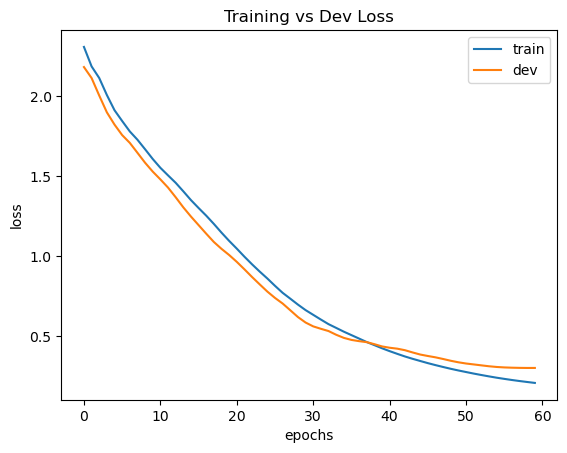

In [25]:
num_epochs=60
train_losses = []
dev_losses = []
    
### TRAINING LOOP WITH LOSS TRACKING ###
for epoch in range(num_epochs):
    model1.train()
    optimizer1.zero_grad()

    # forward pass
    outputs = model1(Xtr_t1)
    loss = criterion1(outputs, Ytr_t1)
    train_losses.append(loss.item())

    # backward + update
    loss.backward()
    optimizer1.step()
    print(f"Epoch {epoch+1}/num_epochs, Loss: {loss.item():.4f}")

    # compute dev/validation loss
    model1.eval()
    with torch.no_grad():
        dev_out = model1(Xtest_t1)
        dev_loss = criterion1(dev_out, Ytest_t1)
        dev_losses.append(dev_loss.item())

### PLOT ###
plt.figure()

plt.plot(train_losses, label='train')
plt.plot(dev_losses, label='dev')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title("Training vs Dev Loss")
plt.show()

### Predict on Test Data
Run the model in evaluation mode, compute the output logits for the test set, and convert these logits into class predictions by taking the index of the largest value (the class with the highest score). Then compare these predicted class labels with the true labels to calculate the model’s accuracy.

In [26]:
with torch.no_grad():
    logits = model1(Xtest_t1)
    Y_pred1 = torch.argmax(logits, dim=1).numpy()
    
##TODO##
accuracy_mlp1 = accuracy_score(Ytest1, Y_pred1)
print(f"Accuracy of MLP: {accuracy_mlp1 * 100:.2f}%")
print("Classification Report :")
print(classification_report(Ytest1, Y_pred1))
print("Confusion Matrix:")
print(confusion_matrix(Ytest1, Y_pred1))

Accuracy of MLP: 90.00%
Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.81      0.75      0.78        28
           2       0.81      0.88      0.84        33
           3       0.86      0.88      0.87        34
           4       0.98      1.00      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       0.97      0.94      0.96        34
           8       0.81      0.87      0.84        30
           9       0.86      0.80      0.83        40

    accuracy                           0.90       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.90      0.90      0.90       360

Confusion Matrix:
[[30  0  0  0  1  1  1  0  0  0]
 [ 0 21  4  0  0  0  0  0  3  0]
 [ 0  2 29  1  0  0  0  0  1  0]
 [ 0  0  2 30  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  1  0

Visualize a sample of images and their predictions for MLP. Check if it is correct.

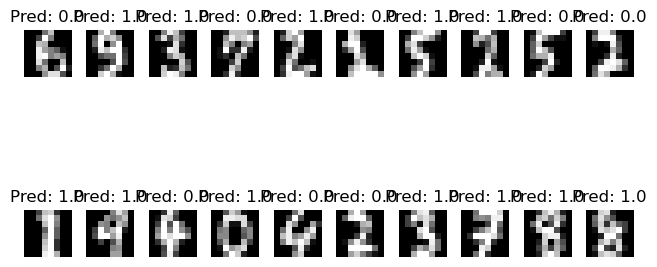

In [27]:
fig, axes = plt.subplots(2, 10)
for i in range(20):
    axes[i//10, i %10].imshow(Xtest1[i].reshape(8, 8), cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"Pred: {Y_pred[i]}")
plt.tight_layout()
plt.show()

## Part (e) Experimenting with Hyperparameters
Experiment with Hidden Layer Configurations

This neural network currently has 2 hidden layers, each with 10 neurons. This is defined using `nn.Linear layers`, for example:`nn.Linear(10, 10)`. 
- Try experimenting with different configurations of hidden layers (e.g., fewer or more layers, or varying the number of neurons per layer) to observe their effect on the model's performance.
- Does increasing the number of layers or neurons always improve the performance? Why or why not?

In PyTorch, you choose activation functions manually (e.g., `nn.ReLU()`, `nn.Tanh()`, `nn.Sigmoid()`).
- Change the activation function and observe how it impacts the model's performance.

In PyTorch, the learning rate is set in the optimizer.
- Investigate the Learning Rate. What does increasing or decreasing the value of learning_rate result in?

# 2.2. Regression Using a Multilayer Perceptron in PyTorch
In this section, you will build and train a Multilayer Perceptron (MLP) in PyTorch to perform a regression task on the `load_diabetes` dataset. The goal is to predict a continuous target value representing diabetes progression, using 10 numerical input features.

In this task, you will:  
(a) Load the dataset using `load_diabetes` from `sklearn.datasets`.  
(b) Split the data into training and test sets.  
(c) Build and train a regression MLP in PyTorch using fully connected layers and an appropriate activation function (e.g., ReLU).  
(d) Evaluate the model’s performance on the test set using regression metrics such as Mean Squared Error (MSE) and R² score.  
(e) Experiment with different hyperparameters (hidden layer sizes, learning rate, number of epochs) to improve performance.  
(f) Plot predicted vs. actual values to visualise how well the model fits the data.

## Part (a)
Load the load_diabetes from sklearn.datasets
Check the X and y of your data
Take a look at the data in `X2` and the target labels in `Y2`. Find their shapes using `.shape`. 
- How many data points are there in `X2`?
- How many features does each data point have?
- Does the data require scaling or normalising before training a neural network model?

In [28]:
diabetes = datasets.load_diabetes()
[X2,Y2]=diabetes['data'], diabetes['target']
print(Y2[0:5])

[151.  75. 141. 206. 135.]


## Part (b) 
Split the data into training and testing sets

In [29]:
##TODO##
Xtr2, Xtest2, Ytr2, Ytest2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [30]:
scaler_X = StandardScaler()
Xtr2 = scaler_X.fit_transform(Xtr2)
Xtest2 = scaler_X.transform(Xtest2)

scaler_Y = StandardScaler()
Ytr2 = scaler_Y.fit_transform(Ytr2.reshape(-1,1))
Ytest2 = scaler_Y.transform(Ytest2.reshape(-1,1))

## Part (c)
Define a multilayer perceptron (MLP) for a regression task using two hidden layers. Each hidden layer should apply a linear transformation followed by a ReLU activation, and the final linear layer should output a single continuous value. Use nn.Sequential to connect the layers and implement the forward pass. The final layer should output a single value for regression.

In [67]:
class MLP_Reg(nn.Module):
    def __init__(self, input_dim, hidden=10):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, 1)  
        )

    def forward(self, x):
        return self.model(x)


Set up the MLP by specifying the input size, the hidden layer sizes, and an output size of 1 for continuous regression. Then create the model and prepare it for training by selecting a suitable loss function for regression (such as `nn.MSELoss()`)

In [68]:
input_dim = Xtr2.shape[1]
hidden_layer_sizes=20
model2 = MLP_Reg(input_dim, hidden_layer_sizes)
criterion2 = nn.MSELoss()
optimizer2 = optim.Adam(model2.parameters(), lr=0.01)

As before, we need to convert our data into PyTorch‑compatible tensors so the model can train on it. 

In [69]:
Xtr_t2 = torch.tensor(Xtr2, dtype=torch.float32)
Ytr_t2 = torch.tensor(Ytr2, dtype=torch.float32).view(-1, 1)
Ytest_t2 = torch.tensor(Ytest2, dtype=torch.float32).view(-1, 1)
Xtest_t2 = torch.tensor(Xtest2, dtype=torch.float32)

Identify the epoch at which the validation loss stops decreasing.

Epoch 1/40, Loss: 1.0200
Epoch 2/40, Loss: 0.9461
Epoch 3/40, Loss: 0.8770
Epoch 4/40, Loss: 0.8086
Epoch 5/40, Loss: 0.7403
Epoch 6/40, Loss: 0.6744
Epoch 7/40, Loss: 0.6149
Epoch 8/40, Loss: 0.5652
Epoch 9/40, Loss: 0.5290
Epoch 10/40, Loss: 0.5073
Epoch 11/40, Loss: 0.4977
Epoch 12/40, Loss: 0.4955
Epoch 13/40, Loss: 0.4956
Epoch 14/40, Loss: 0.4945
Epoch 15/40, Loss: 0.4917
Epoch 16/40, Loss: 0.4862
Epoch 17/40, Loss: 0.4783
Epoch 18/40, Loss: 0.4686
Epoch 19/40, Loss: 0.4591
Epoch 20/40, Loss: 0.4510
Epoch 21/40, Loss: 0.4452
Epoch 22/40, Loss: 0.4417
Epoch 23/40, Loss: 0.4407
Epoch 24/40, Loss: 0.4416
Epoch 25/40, Loss: 0.4429
Epoch 26/40, Loss: 0.4432
Epoch 27/40, Loss: 0.4415
Epoch 28/40, Loss: 0.4379
Epoch 29/40, Loss: 0.4334
Epoch 30/40, Loss: 0.4292
Epoch 31/40, Loss: 0.4260
Epoch 32/40, Loss: 0.4239
Epoch 33/40, Loss: 0.4225
Epoch 34/40, Loss: 0.4211
Epoch 35/40, Loss: 0.4191
Epoch 36/40, Loss: 0.4168
Epoch 37/40, Loss: 0.4149
Epoch 38/40, Loss: 0.4134
Epoch 39/40, Loss: 0.

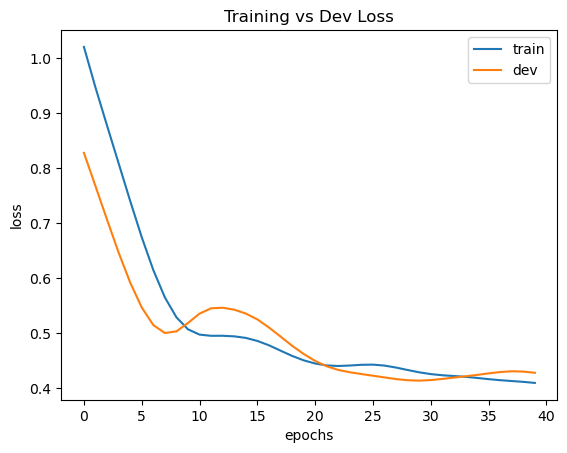

In [70]:
num_epochs=40
train_losses = []
dev_losses = []
    
### TRAINING LOOP WITH LOSS TRACKING ###
for epoch in range(num_epochs):
    model2.train()
    optimizer2.zero_grad()

    # forward pass
    outputs = model2(Xtr_t2)
    loss = criterion2(outputs, Ytr_t2)
    train_losses.append(loss.item())

    # backward + update
    loss.backward()
    optimizer2.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

    # compute dev/validation loss
    model2.eval()
    with torch.no_grad():
        dev_out = model2(Xtest_t2)
        dev_loss = criterion2(dev_out, Ytest_t2)
        dev_losses.append(dev_loss.item())

### PLOT ###
plt.figure()
plt.plot(train_losses, label='train')
plt.plot(dev_losses, label='dev')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title("Training vs Dev Loss")
plt.show()

## Part (d)
Make predictions on the test set (`Xtest2`).
Evaluate the model using appropriate metrics from sklearn.metrics.

In [71]:
with torch.no_grad():
    y_pred2 = model2(Xtest_t2).numpy().flatten()

# TODO: Evaluate regression performance
from sklearn.metrics import mean_squared_error, r2_score
y_pred2_unscaled = scaler_Y.inverse_transform(y_pred2.reshape(-1,1)).flatten()
mse = mean_squared_error(Ytest2, y_pred2)
r2 = r2_score(Ytest2, y_pred2)
print(f"MSE of MLP: {mse:.4f}")
print(f"R² Score of MLP: {r2:.4f}")

MSE of MLP: 0.4284
R² Score of MLP: 0.5087


## Part (e) Experimenting with Hyperparameters
Experiment with Hidden Layer Configurations

This neural network currently has 2 hidden layers, each with 10 neurons. This is defined using `nn.Linear layers`, for example:`nn.Linear(10, 10)`. 
- Try experimenting with different configurations of hidden layers (e.g., fewer or more layers, or varying the number of neurons per layer) to observe their effect on the model's performance.
- Does increasing the number of layers or neurons always improve the performance? Why or why not?

In PyTorch, you choose activation functions manually (e.g., `nn.ReLU()`, `nn.Tanh()`, `nn.Sigmoid()`).
- Change the activation function and observe how it impacts the model's performance.

In PyTorch, the learning rate is set in the optimizer.
- Investigate the Learning Rate. What does increasing or decreasing the value of learning_rate result in?

## Part (f)
Plot the predicted vs actual values
After training the `MLP_Reg` and predicting the outputs for `Xtest2`, create a scatter plot to compare the predicted values (`y_pred2`) against the actual values (`Ytest2`).

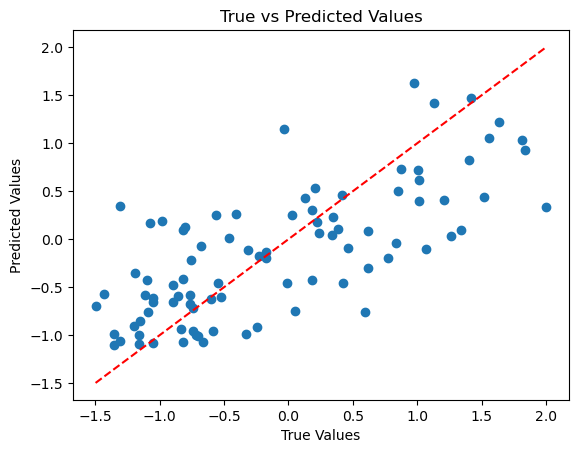

In [42]:
# TODO# plot the predicted vs actual values
plt.scatter(Ytest2, y_pred2)
plt.plot([min(Ytest2), max(Ytest2)], [min(Ytest2), max(Ytest2)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()
